In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [58]:
df = pd.read_csv("data.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


### Preprocessing

In [59]:
df.drop(["ID", "Var_1"], axis=1, inplace=True)
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A


Dealing with ordinal features like: Gender, Ever_Married, Graduated

In [60]:
from sklearn.preprocessing import LabelEncoder

ordinal_features = ["Gender", "Ever_Married", "Graduated"]

label_encoder = LabelEncoder()

for column in ordinal_features:
    df[column] = label_encoder.fit_transform(df[column])


In [61]:
ordinal_mapping = {'Low': 1, 'Average': 2, 'High': 3}

# Map the ordinal values to the variable
df['Spending_Score'] = df['Spending_Score'].map(ordinal_mapping)


In [62]:
df.dropna(inplace=True)

In [63]:
for column in df.columns:
    print(f"{column}: {pd.unique(df[column])}")

df.head()

Gender: [1 0]
Ever_Married: [0 1 2]
Age: [22 67 56 32 33 61 55 26 19 58 41 31 79 49 18 36 35 45 42 83 27 28 47 40
 57 76 25 48 74 59 51 30 63 52 39 38 60 68 86 43 80 37 46 72 69 50 29 71
 78 82 70 23 20 21 53 85 75 65 89 62 66 73 77 87 84 88 81]
Graduated: [0 1 2]
Profession: ['Healthcare' 'Engineer' 'Lawyer' 'Artist' 'Doctor' 'Homemaker'
 'Entertainment' 'Executive' 'Marketing']
Work_Experience: [ 1.  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]
Spending_Score: [1 3 2]
Family_Size: [4. 1. 2. 3. 5. 6. 8. 7. 9.]
Segmentation: ['D' 'B' 'C' 'A']


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,0,22,0,Healthcare,1.0,1,4.0,D
2,0,1,67,1,Engineer,1.0,1,1.0,B
3,1,1,67,1,Lawyer,0.0,3,2.0,B
5,1,1,56,0,Artist,0.0,2,2.0,C
6,1,0,32,1,Healthcare,1.0,1,3.0,C


In [64]:
# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df['Profession']).astype(int)

# Concatenate the one-hot encoded columns to the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

df = df.drop("Profession", axis=1)

for column in df.columns:
    print(f"{column}: {pd.unique(df[column])}")

df.head()

Gender: [1 0]
Ever_Married: [0 1 2]
Age: [22 67 56 32 33 61 55 26 19 58 41 31 79 49 18 36 35 45 42 83 27 28 47 40
 57 76 25 48 74 59 51 30 63 52 39 38 60 68 86 43 80 37 46 72 69 50 29 71
 78 82 70 23 20 21 53 85 75 65 89 62 66 73 77 87 84 88 81]
Graduated: [0 1 2]
Work_Experience: [ 1.  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]
Spending_Score: [1 3 2]
Family_Size: [4. 1. 2. 3. 5. 6. 8. 7. 9.]
Segmentation: ['D' 'B' 'C' 'A']
Artist: [0 1]
Doctor: [0 1]
Engineer: [0 1]
Entertainment: [0 1]
Executive: [0 1]
Healthcare: [1 0]
Homemaker: [0 1]
Lawyer: [0 1]
Marketing: [0 1]


,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,1,0,22,0,1.0,1,4.0,D,0,0,0,0,0,1,0,0,0
2,0,1,67,1,1.0,1,1.0,B,0,0,1,0,0,0,0,0,0
3,1,1,67,1,0.0,3,2.0,B,0,0,0,0,0,0,0,1,0
5,1,1,56,0,0.0,2,2.0,C,1,0,0,0,0,0,0,0,0
6,1,0,32,1,1.0,1,3.0,C,0,0,0,0,0,1,0,0,0


In [65]:
X = df.drop("Segmentation", axis=1)
y = df["Segmentation"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [66]:
#feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [67]:
np.sqrt(y.shape)

array([95.46727188])

In [68]:
K = int(np.sqrt(y.shape))

knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=95)

In [69]:
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[191, 110,  82,  95],
       [103, 114, 147,  53],
       [ 77,  64, 227,  64],
       [126,  29,  39, 302]], dtype=int64)

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average="macro")
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average="macro")
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average="macro")
print("F1 Score:", f1)

Accuracy: 0.4574876577070762
Precision: 0.4475154457080789
Recall: 0.4518242039067716
F1 Score: 0.4475483161456213


### Testing various k values

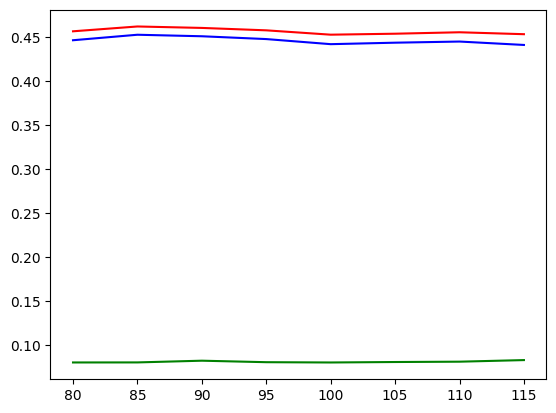

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, silhouette_score

ks = range(80, 120, 5)

accuracies = []
f1s = []
silhouette_scores = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracies.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average="macro"))
    silhouette_scores.append(silhouette_score(X_test, y_pred))

plt.plot(ks, accuracies, c='r')
plt.plot(ks, f1s, c='b')
plt.plot(ks, silhouette_scores, c='g')
plt.show()

# K-Means

In [72]:
from sklearn.cluster import KMeans

k = 4  
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_train)

clusters = kmeans.labels_

In [73]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_train, clusters)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.21342837298214365


In [74]:
# Get the WCSS value
wcss = kmeans.inertia_
print("WCSS:", wcss)


WCSS: 83598.6910608684


### kmeans for different k values

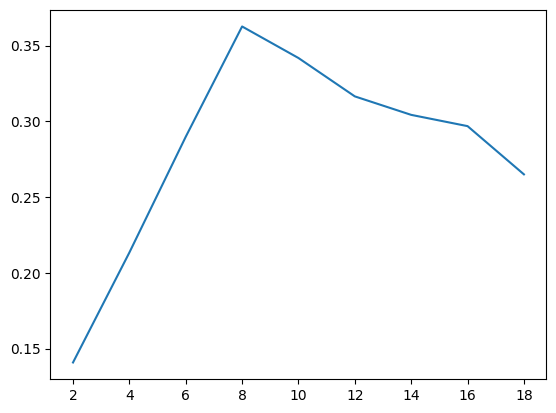

In [75]:
silhouette_scores = []

ks = range(2, 20, 2)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    clusters = kmeans.labels_
    
    silhouette_scores.append(silhouette_score(X_train, clusters))

plt.plot(ks, silhouette_scores)

# Conclusion

Since its very clear that the Silhoutte score peaks at k = 8 and post that, we see a decline. Hence, eight clusters is the best clustering criteria here.